In [119]:

import pandas as pd
import numpy as np
import sys, os
import re
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from database.connect_db import connect


In [82]:
# Connect database
query = "SELECT * FROM bronze.raw_data"
conn, cur = connect()
df = pd.read_sql_query(query, conn)

Database connected successfully!


C:\Users\Gray\AppData\Local\Temp\ipykernel_13056\3984953757.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


#### Khám phá dữ liệu (EDA)
---

In [83]:
df.columns

Index(['id', 'title', 'address', 'area', 'floors', 'furniture', 'bedrooms',
       'bathrooms', 'price', 'price_m2', 'posted_date', 'link'],
      dtype='object')

**Notes:**
- ``floors:`` Số tầng
- ``furniture:`` nội thất


In [112]:
df.shape

(2814, 11)

Có 2814 sample với 11 columns

In [84]:
# Preview data
df.head()

,id,title,address,area,floors,furniture,bedrooms,bathrooms,price,price_m2,posted_date,link
0,1,"DUY NHẤT - NHÀ 3 TẦNG KIÊN CỐ, SẴN DÒNG TIỀN 3...","Phường 13, Tân Bình, Hồ Chí Minh",101 m²,None,Full nội thất,None,None,"17,5 tỷ","~173,27 triệu/m²",17/11/2025,https://batdongsan.com.vn/ban-nha-rieng-phuong...
1,2,"Chính chủ bán nhà riêng, hoàn công 2023, SHR, ...","Đường Tân Thới Nhất 17, Phường Tân Thới Nhất, ...",84 m²,3 tầng,Đầy đủ,4 phòng,4 phòng,"12,7 tỷ","~151,19 triệu/m²",17/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
2,3,"Chú VINH CẦN BÁN CĂN NHÀ 3,68Tỷ Ở CHU VĂN AN, ...","Chu Văn An, 12, Bình Thạnh, Hồ Chí Minh 3,68Tỷ","51,2 m²",2 tầng,None,4 phòng,4 phòng,"3,68 tỷ","~71,88 triệu/m²",16/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
3,4,Bán nhà mới xây Gò Vấp 6 tầng có thang máy gar...,"Đường Quang Trung, Phường 10, Gò Vấp, Hồ Chí Minh",85 m²,6 tầng,Cao cấp,5 phòng,8 phòng,"16,5 tỷ","~194,12 triệu/m²",20/10/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
4,5,Nhà hẻm xe hơi - 2 lầu full nội thất - Huỳnh T...,"Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",60 m²,3 tầng,Full nội thất,4 phòng,4 phòng,"7,49 tỷ","~124,83 triệu/m²",16/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...


Cột id chỉ là cột đánh dấu số thứ tự trong database nên không cần thiết vì vậy ta sẽ drop nó đi và set index lại giống id.

In [85]:
df.set_index("id",inplace=True)

In [86]:
df.head()

,title,address,area,floors,furniture,bedrooms,bathrooms,price,price_m2,posted_date,link
id,,,,,,,,,,,
1,"DUY NHẤT - NHÀ 3 TẦNG KIÊN CỐ, SẴN DÒNG TIỀN 3...","Phường 13, Tân Bình, Hồ Chí Minh",101 m²,None,Full nội thất,None,None,"17,5 tỷ","~173,27 triệu/m²",17/11/2025,https://batdongsan.com.vn/ban-nha-rieng-phuong...
2,"Chính chủ bán nhà riêng, hoàn công 2023, SHR, ...","Đường Tân Thới Nhất 17, Phường Tân Thới Nhất, ...",84 m²,3 tầng,Đầy đủ,4 phòng,4 phòng,"12,7 tỷ","~151,19 triệu/m²",17/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
3,"Chú VINH CẦN BÁN CĂN NHÀ 3,68Tỷ Ở CHU VĂN AN, ...","Chu Văn An, 12, Bình Thạnh, Hồ Chí Minh 3,68Tỷ","51,2 m²",2 tầng,None,4 phòng,4 phòng,"3,68 tỷ","~71,88 triệu/m²",16/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
4,Bán nhà mới xây Gò Vấp 6 tầng có thang máy gar...,"Đường Quang Trung, Phường 10, Gò Vấp, Hồ Chí Minh",85 m²,6 tầng,Cao cấp,5 phòng,8 phòng,"16,5 tỷ","~194,12 triệu/m²",20/10/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
5,Nhà hẻm xe hơi - 2 lầu full nội thất - Huỳnh T...,"Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",60 m²,3 tầng,Full nội thất,4 phòng,4 phòng,"7,49 tỷ","~124,83 triệu/m²",16/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...


Sau khi set id thành index thì id sẽ không còn là cột trong dataframe nữa

#### Feature Classification (Phân loại đặc trưng)
---
``Mục đích:`` Chọn đúng biểu đồ để trực quan hóa và chọn đúng kỹ thuật tiền xử lý dữ liệu.

1/ Đặc trưng định tính(Categorical Features)

Các đặc trưng định tính(hay còn gọi là biến ohân loại) là những biến mà giá trị của chúng là các nhãn(labels) hoặc danh mục(categories).

``Các loại phổ biến:``
- ``Nominal(Danh nghĩa):`` Các danh mục không có thứ tự hoặc xếp hạng tự nhiên.
    Ví dụ: Màu sắc(Xanh, đỏ, vàng), quốc gia(Việt Nam, Lào)
- ``Ordinal(Thứ tự):`` Các danh mục có thứ tự hoặc xếp hạng tự nhiên.
    Ví dụ: Mức độ hài lòng(Rất tệ, tệ), cấp bậc

2/ Đặc trưng định lượng(Numerical Features)

Các đặc trưng định lượng(hay còn gọi là biến số) là những biến mà giá trị của chúng là các số và có ý nghĩa toán học.

``Các loại phổ biến:``
- ``Discrete(rời rạc):`` Các giá trị là số nguyên, kết quả của việc đếm.
    Ví dụ: Số lượng phòng ngủ, số lần nhấp chuột, số lượng học sinh
- ``Continuous(Liên tục):`` Các giá trị có thể là bất kỳ số nào trong một phạm vi, kết quả của việc đo lường.
    Ví dụ: Diện tích, giá, nhiệt độ, độ cao.
- ``Timeseries(chuỗi thời gian):`` Là một dạng liên tục đặc biệt, được sắp xếp theo trình tự thời gian.
    Ví dụ: Gía cổ phiếu hàng ngày, nhiệt độ trung bình, ngày đăng tin.

``TẠI SAO VIỆC PHÂN LOẠI LẠI QUAN TRỌNG?``

1/ Chọn biểu đồ trực quan hóa (Visualization):
- ``Định lượng:`` Thường dùng Histogram, Box Plot, Scatter Plot.
- ``Định tính:`` Thường dùng Bar Chart(Biểu đồ thanh), Pie Chart.

2/ Xử lý giá trị thiếu(Missing values):
- ``Định lượng:`` Thường thay thế bằng giá trị Trung bình(Mean), hoặc trung vị (Median).
- ``Định tính:`` Thường thay thế bằng Mode(Gía trị xuất hiện nhiều nhất) hoặc một danh mục mới("Unknow")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 1 to 2814
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2791 non-null   object
 1   address      2791 non-null   object
 2   area         2791 non-null   object
 3   floors       2380 non-null   object
 4   furniture    1619 non-null   object
 5   bedrooms     2349 non-null   object
 6   bathrooms    2238 non-null   object
 7   price        2791 non-null   object
 8   price_m2     2628 non-null   object
 9   posted_date  2791 non-null   object
 10  link         2814 non-null   object
dtypes: object(11)
memory usage: 263.8+ KB


Hiện tại thì các giá trị đều là object vì trong mỗi cột đề có text nên sau khi tiền xử lý dữ liệu ta sẽ fix lại Dtype.

Dựa vào thông tin trên thì hầu hết các cột đều có giá trị null: ``furniture`` > ``bathrooms`` > ``bedrooms`` > ``floors`` > ``price_m2`` 

Vì data của mình đều là text nên mình sẽ làm sạch cơ bản trước.

``Notes:``
- ``price:`` Đơn vị tỷ
- ``price_m2:`` Đơn vị triệu/m2

In [88]:
def extract_numeric(df):
    feature_to_processing = ['area','floors','bedrooms', 'bathrooms', 'price','price_m2']
    for col in feature_to_processing:
        df[col] = df[col].astype(str).str.extract(r'([0-9.,-]+)', expand=False)
    return df
df = extract_numeric(df)
df.head()

,title,address,area,floors,furniture,bedrooms,bathrooms,price,price_m2,posted_date,link
id,,,,,,,,,,,
1,"DUY NHẤT - NHÀ 3 TẦNG KIÊN CỐ, SẴN DÒNG TIỀN 3...","Phường 13, Tân Bình, Hồ Chí Minh",101,NaN,Full nội thất,NaN,NaN,"17,5","173,27",17/11/2025,https://batdongsan.com.vn/ban-nha-rieng-phuong...
2,"Chính chủ bán nhà riêng, hoàn công 2023, SHR, ...","Đường Tân Thới Nhất 17, Phường Tân Thới Nhất, ...",84,3,Đầy đủ,4,4,"12,7","151,19",17/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
3,"Chú VINH CẦN BÁN CĂN NHÀ 3,68Tỷ Ở CHU VĂN AN, ...","Chu Văn An, 12, Bình Thạnh, Hồ Chí Minh 3,68Tỷ","51,2",2,None,4,4,"3,68","71,88",16/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
4,Bán nhà mới xây Gò Vấp 6 tầng có thang máy gar...,"Đường Quang Trung, Phường 10, Gò Vấp, Hồ Chí Minh",85,6,Cao cấp,5,8,"16,5","194,12",20/10/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...
5,Nhà hẻm xe hơi - 2 lầu full nội thất - Huỳnh T...,"Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",60,3,Full nội thất,4,4,"7,49","124,83",16/11/2025,https://batdongsan.com.vn/ban-nha-rieng-duong-...


Sau khi fix lại thì có thể thấy các cột trên đã loại bỏ được các text dư thừa, nhưng về Data type thì chưa được fix nên chúng ta sẽ fix tiếp phần datatype để feature classification.


In [89]:
df['furniture'].unique()

array(['Full nội thất', 'Đầy đủ', None, 'Cao cấp', 'Cơ bản',
       'Full nội thất cao cấp nhập khẩu.', 'Không nội thất', 'Full.',
       'Đầy đủ.', 'Full nội thất cao cấp.', 'Cơ bản.',
       '- Nội thất cao cấp và trang bị đầy đủ trang thiết bị đồ dùng nhà bếp cho 7 căn hộ.',
       'Tặng full nội thất.', 'NỘI THẤT CAO CẤP',
       'Nội thất + Trang thiết bị cao cấp mới !', 'Full nội thất.',
       'Đầy đủ nội thất.',
       'Nội thất đầy đủ: Điều hòa, tủ lạnh, giường...',
       'Nội thất cao cấp, thoáng sáng.', 'Không nội thất.',
       'Tặng nội thất cơ bản.', 'Nội thất gỗ sang trọng.',
       'Nội thất cao cấp: Bếp, tủ bếp, giường, tủ, máy lạnh, máy nước nóng, máy giặt,...',
       'Có nội thất, có sẵn thang máy.',
       '- Nội thất đầy đủ: Điều hòa, giường, tủ lạnh.',
       'Tặng luôn nội thất.', 'Nội thất cao cấp', 'Full nội thất',
       'Trang bị sẵn nội thất mới.',
       'Cơ bản trang bị đầy đủ nội thất: Tivi 65in, máy lạnh, máy quạt, máy giặt, bàn ăn, sofa, kệ bếp, tủ 

Dự tính ban đầu của tôi là sẽ đưa feature này về ordinal nhưng sau khi xem list value của nó thì tôi quyết định giữ lại nó là object.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 1 to 2814
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2791 non-null   object
 1   address      2791 non-null   object
 2   area         2791 non-null   object
 3   floors       2380 non-null   object
 4   furniture    1619 non-null   object
 5   bedrooms     2349 non-null   object
 6   bathrooms    2238 non-null   object
 7   price        2628 non-null   object
 8   price_m2     2628 non-null   object
 9   posted_date  2791 non-null   object
 10  link         2814 non-null   object
dtypes: object(11)
memory usage: 263.8+ KB


In [91]:
# Fix datatype
feature_to_numeric = ['area', 'floors', 'bedrooms', 'bathrooms', 'price', 'price_m2']
def convert_cat(df, feature):
    for col in feature:
        df[col] = df[col].str.replace(',', '.').astype("float")
    return df
df = convert_cat(df, feature_to_numeric)
df['furniture'] = df['furniture'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 1 to 2814
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   title        2791 non-null   object  
 1   address      2791 non-null   object  
 2   area         2791 non-null   float64 
 3   floors       2380 non-null   float64 
 4   furniture    1619 non-null   category
 5   bedrooms     2349 non-null   float64 
 6   bathrooms    2238 non-null   float64 
 7   price        2628 non-null   float64 
 8   price_m2     2628 non-null   float64 
 9   posted_date  2791 non-null   object  
 10  link         2814 non-null   object  
dtypes: category(1), float64(6), object(4)
memory usage: 247.3+ KB


Có thể thấy các feature trên đã được fix datatype sang float.

In [92]:
# Kiểm tra phân bố dữ liệu numerical
df.describe()

,area,floors,bedrooms,bathrooms,price,price_m2
count,2791.000000,2380.000000,2349.000000,2238.000000,2628.000000,2628.000000
mean,80.197646,3.178571,4.562793,4.415996,14.857002,134.974951
std,60.049831,1.322217,4.969069,4.666418,61.927596,64.255514
min,1.925000,1.000000,1.000000,1.000000,1.080000,3.000000
25%,51.000000,2.000000,3.000000,2.000000,5.800000,91.410000
50%,65.000000,3.000000,4.000000,4.000000,7.950000,125.710000
75%,90.000000,4.000000,5.000000,5.000000,12.000000,168.290000
max,866.000000,9.000000,80.000000,81.000000,985.000000,722.890000


Nhìn vào sự phân bố của dữ liệu trên, rút ra được một số nhận xét sau:
- ``area``: Diện tích trung bình khoảng 80.2, giá trị tối đa là 866 lớn hơn rất nhiều so với 75% dữ liệu(90), cho thấy được những bất động sản rất lớn hoặc nhập số liệu bị sai.
- ``floors``: Trung bình số tầng là 3.2, tối đa là 9 tầng.
- ``bedrooms``: Trung bình khoảng 4.6 phòng, giá trị tối đa là 80, cho thấy được outlier rất lớn.
- ``bathrooms``: Tương tự như ``bedrooms`` thì bathrooms cũng cho thấy outlier rất lớn.
- ``price``: Trung bình là 14.85 và giá trị tối đa là 985 cho thấy có những bất động sản có giá trị rất cao.
- ``price_m2``: Trung bình là 134.97 với độ lệch chuẩn khá lớn (64.25) cho thấy giá trên mét vuông có sự khác biệt giữa các bất động sản.

In [93]:
# Kiểm tra phân bố dữ liệu categorical
df.describe(include=['category'])

,furniture
count,1619
unique,84
top,Đầy đủ
freq,928


Tổng là 1619 giá trị và có 84 giá trị độc nhất, và giá trị xuất hiện nhiều nhất là "Đầy đủ" với 928 lần xuất hiện trên 1619.

In [106]:
df["furniture"] = df["furniture"].str.replace('.', "")
df["furniture"].value_counts().to_frame()


,count
furniture,
Đầy đủ,1011
Cơ bản,395
Không nội thất,87
Full nội thất,17
Full,13
...,...
Nội thất rất đẹp,1
Nội thất gỗ tự nhiên cao cấp,1
Tặng Nội thất mới sang trọng,1


In [107]:
df['furniture'] = df['furniture'].astype('category')
df.describe(include=['category'])


,furniture
count,1619
unique,74
top,Đầy đủ
freq,1011


Sau khi tôi loại bỏ đi dấu chấm thì giá thị unique còn lại là 74 nhưng thật chất trong 74 giá trị này thì chỉ có vài giá trị unique thật sự ví dụ đầy đủ, cơ bản, hay không nội thất. Nên tôi quyết định sẽ không sử dụng feature này.

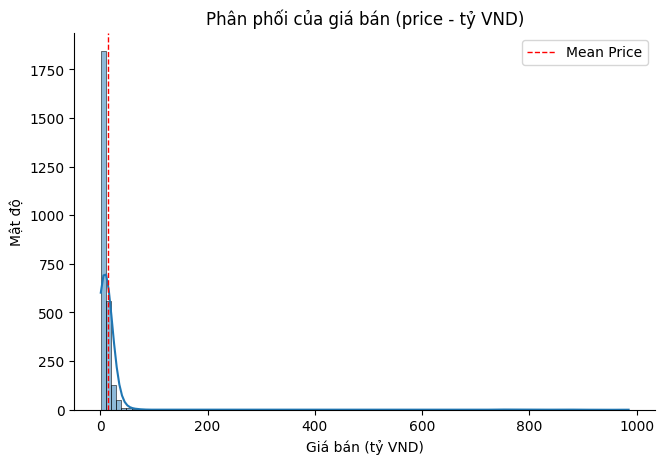

In [133]:
sns.displot(df['price'], kde=True, height=4.5, aspect=1.5)
plt.axvline(df['price'].mean(), color='red', linestyle='--', linewidth=1, label = "Mean Price")
plt.legend()
plt.title("Phân phối của giá bán (price - tỷ VND)")
plt.xlabel("Giá bán (tỷ VND)")
plt.ylabel("Mật độ")
plt.show()

# Tạo một cột mới chứa Log của Price (sử dụng np.log1p để xử lý cả giá trị 0 nếu có)
# df['price_log'] = np.log1p(df['price']) 

# # Vẽ lại biểu đồ phân phối bằng cột mới
# sns.displot(df['price_log'].dropna(), kde=True, height=4.5, aspect=1.5)
# plt.title("Phân phối của Log(Giá bán)")
# plt.xlabel("Log(Giá bán)")
# plt.show()

Nhìn vào biểu đồ histogram cho ta thấy được hầu hết giá nhà đều tập trung vào khoảng bên trái (mean = 7.95 tỷ) nhưng các bất động sản siêu đắt ví dụ là 985 tỷ (outlier) -> Làm biểu đồ bị xấu và nhìn vào biểu đồ khó có thể rút ra được thông tin hữu ích. Từ đó ta sẽ sử dụng biến đổi logarit để nén các giá trị lớn lại gần nhau.

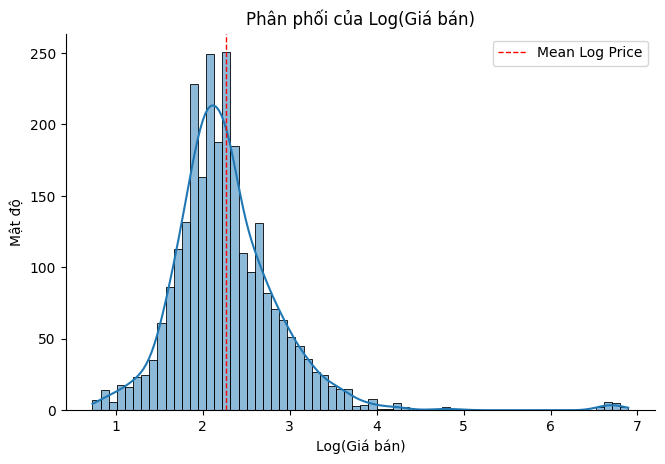

In [140]:
# Tạo cột mới là price_log
df['price_log'] = np.log1p(df['price'])
sns.displot(df["price_log"], kde = True, height=4.5, aspect=1.50)
plt.axvline(df['price_log'].mean(), color='red', linestyle='--', linewidth=1, label = "Mean Log Price")
plt.legend()
plt.title("Phân phối của Log(Giá bán)")
plt.xlabel("Log(Giá bán)")
plt.ylabel("Mật độ")
plt.show()

Với biểu đồ log price này thì chúng ta có thể nhìn rõ được cái phân phối về giá nhà nằm ở phân khúc nào và dễ thấy được có một số bất động sản có giá rất lớn. 

Biểu đồ phân phối của biến ``price`` được trực quan hóa bằng sns.displot() kèm đường ``KDE`` để thấy được cu hướng và mật độ phân tán của giá nhà. Đường thẳng đứng màu đỏ là ``giá trị trung binhf`` được thêm bằng ``plt.axvline(...)`` để so sánh vị trí mean với toàn bộ phân phối.

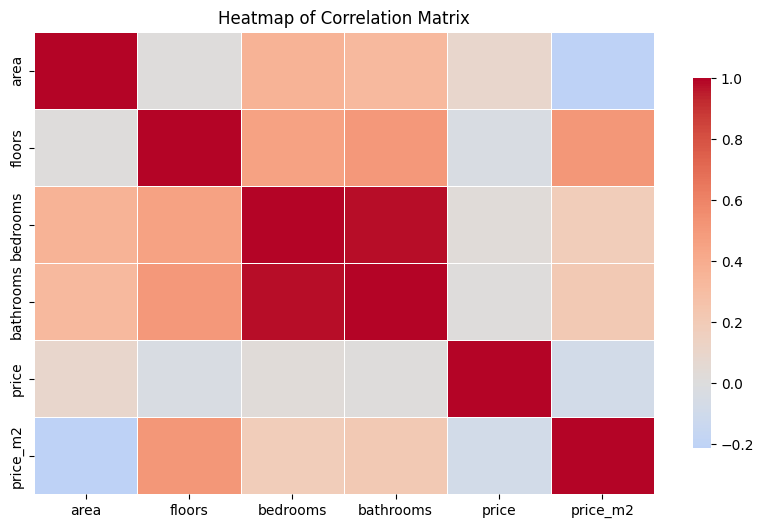

In [144]:
df.drop('price_log', axis=1, inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), 
            cmap='coolwarm',
            linewidths=0.5,
            center = 0,
            cbar_kws={"shrink": 0.8})
plt.title("Heatmap of Correlation Matrix")
plt.show()

``Ma trận tương quan(heatmap)`` trực quan hóa mức độ tương quan giữa các thuộc tính số. Thang màu coolwarm: xanh là tương quan âm, đỏ là tương quan dương, trắng là center là quan hê yếu. Đường kẻ mảnh linewidths = 0.5 phân tách các ô. Heatmap giúp nhận diện đặc trưng có mối quan hệ chặt chẽ, hỗ trợ lựa chọn biến khi xây dựng mô hình.

Nhìn vào biểu đồ heatmap thì ta rút ra được một số nhận xét:
- Vì biểu đồ có các giá trị ngoại lai rất lớn nên cho ta thấy sự tương quan giữa price_m2 với price là tương quan âm.
- Đa cộng tuyến: Sự tương quan mạnh của 2 feature là bathrooms và bedrooms -> nếu sử dụng cả 2 feature này cùng trong mô hình thì sẽ kém ổn định. Từ đó, ta sẽ cân nhắc việc sử dụng 1 trong 2 feature này hoặc kết hợp chúng.
- Feature quan trọng: Biến area có tương quan mạnh với price -> ``feature quan trọng trong việc dự đoán giá nhà.``